# Titanic Survival Prediction using Machine Learning

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

We're going to take the following approch:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Definiation
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import datetime
print(f"Last update: {datetime.datetime.now()}")

Last update: 2024-04-17 10:20:44.383727


In [2]:
# 0. Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots apprear inside the notebook
%matplotlib inline

# Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import plot_roc_curve

In [3]:
# 1. Getting the data ready
titanic_df = pd.read_csv("data/train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Classification Predictive Modeling
Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

The output variables are often called labels or categories. The mapping function predicts the class or category for a given observation.

For example, an email of text can be classified as belonging to one of two classes: “spam“ and “not spam“.

* classification problem requires that examples be classified into one of two or more classes.
* classification can have real-valued or discrete input variables.
* problem with two classes is often called a two-class or binary classification problem.
* problem with more than two classes is often called a multi-class classification problem.
* problem where an example is assigned multiple classes is called a multi-label classification problem.

For more information about diffrences between `classification` and  `regression` go here: https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/
  

In [4]:
titanic_df.shape

(891, 12)

## Fill Missing Values

In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# drop the "Cabin" column from the dataFarme because all column value is empty
titanic_df = titanic_df.drop(columns="Cabin", axis = 1)

In [7]:
# Replace the missing values in "Age" with median value
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

C:\Users\559az\AppData\Local\Temp\ipykernel_15316\2738356588.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)


In [8]:
# finding more value of "Embarked" column
titanic_df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [9]:
titanic_df["Embarked"].mode()[0]

'S'

In [10]:
titanic_df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [11]:
# replaceing the missing values in "embarked" column with mode value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [12]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Analysis

In [13]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Visualization

In [14]:
titanic_df["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [15]:
titanic_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

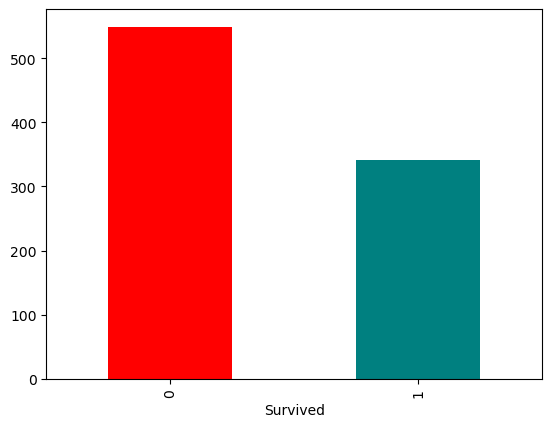

In [16]:
titanic_df["Survived"].value_counts().plot(kind="bar", color=["red", "teal"])

In [17]:
sns.set()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

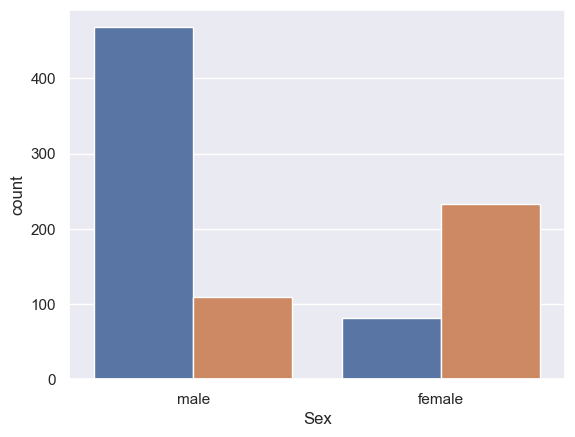

In [19]:
# making a count plot for "Survived"
sns.countplot(x="Sex", hue="Survived", data=titanic_df)

<Axes: xlabel='Pclass', ylabel='count'>

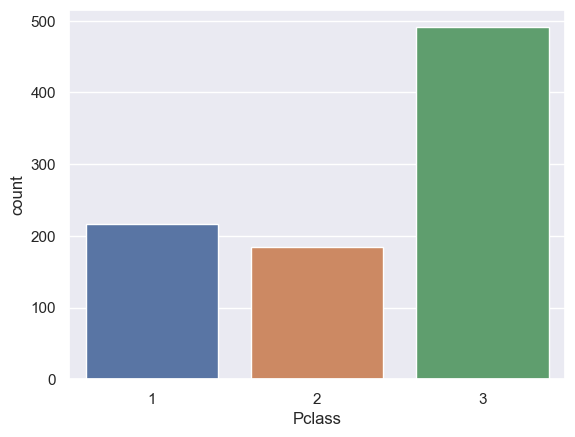

In [20]:
sns.countplot(x="Pclass", data=titanic_df)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

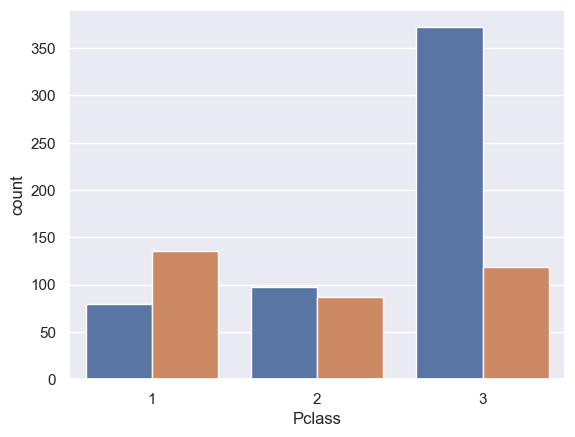

In [21]:
sns.countplot(x="Pclass", hue="Survived", data=titanic_df)

In [22]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Surviaval Frequency according to Sex

In [23]:
titanic_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [24]:
# Compare Survived column with Sex column
pd.crosstab(titanic_df.Survived, titanic_df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

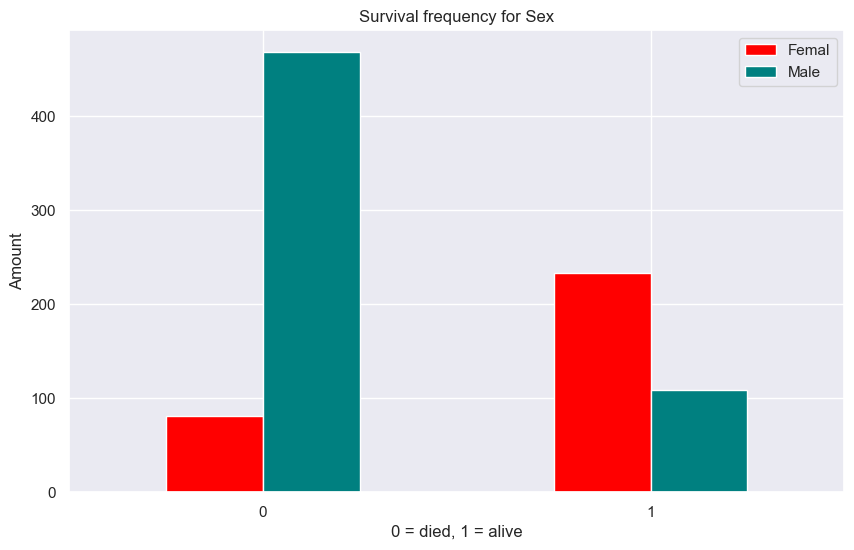

In [25]:
# create a plot of crosstab
pd.crosstab(titanic_df.Survived, titanic_df.Sex).plot(kind="bar",
                                                      figsize=(10, 6),
                                                      color=["red", "teal"])
plt.title("Survival frequency for Sex")
plt.xlabel("0 = died, 1 = alive")
plt.ylabel("Amount")
plt.legend(["Femal", "Male"])
plt.xticks(rotation=0)


In [26]:
titanic_df["Sex"].value_counts() # This column is categorical is male and female

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
titanic_df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [28]:
# Convert categorical columns to numeric
titanic_df = titanic_df.replace({"Sex": {"male":0, "female":1}, "Embarked": {"S": 0, "C": 1, "Q": 2}})

C:\Users\559az\AppData\Local\Temp\ipykernel_15316\1525197351.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df = titanic_df.replace({"Sex": {"male":0, "female":1}, "Embarked": {"S": 0, "C": 1, "Q": 2}})


## Seperating features and Target

In [29]:
X = titanic_df.drop(columns=["PassengerId", "Name", "Ticket", "Survived"], axis=1)
y = titanic_df["Survived"]

In [30]:
X.shape


(891, 7)

## Spiliting the data into trainig data and test data


In [31]:
# Trainig and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X.shape, X_train.shape, X_test.shape

((891, 7), (712, 7), (179, 7))

## Logistic Regression Model

In [33]:
model1 = LogisticRegression()

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


In [35]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [36]:
# Fitting the model
model1.fit(X_train, y_train)
# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_minmax = min_max_scaler.fit_transform(X_train)

D:\ml-course\titanic-survival-prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluation

In [37]:
# Accuracy Score
X_train_prediction = model1.predict(X_train)

In [38]:
X_train_prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [39]:
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print("Accuracy score of training data: ", training_data_accuracy)

Accuracy score of training data:  0.800561797752809


In [40]:
# Accuracy on test data
X_test_prediction = model1.predict(X_test)

In [41]:
print(X_test_prediction)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [42]:
testing_data_accuracy = accuracy_score(y_test, X_test_prediction)
print("Accuracy score of training data: ", testing_data_accuracy)

Accuracy score of training data:  0.7988826815642458


In [43]:
# Evaluation with cross_val_score (another score method)
cvs = cross_val_score(estimator=model1, X=X, y=y, cv=5, scoring="accuracy")
cvs

D:\ml-course\titanic-survival-prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\ml-course\titanic-survival-prediction\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

array([0.79329609, 0.79213483, 0.78651685, 0.76966292, 0.83146067])

## RandomForestClassifier

In [46]:
model_RFC = RandomForestClassifier()

In [47]:
# fitting the model
model_RFC.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
# Accuracy score
X_train_RFC_pred = model_RFC.predict(X_train)

In [48]:
training_data_RFC_accuracy = accuracy_score(y_train, X_train_RFC)
print("Accuracy score of training data: ", training_data_RFC_accuracy)

NameError: name 'X_train_RFC' is not defined

In [ ]:
# Evaluation with cross_val_score (another score method)
cvs_RFC = cross_val_score(estimator=model_RFC, X=X, y=y, cv=5, scoring="accuracy")
cvs_RFC

### LDA Model

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
model_LDA = LinearDiscriminantAnalysis()

In [ ]:
model_LDA.fit(X_train, y_train)

In [ ]:
# Accuracy Score
X_train_LDA = model_LDA.predict(X_train)
X_train_LDA

In [ ]:
training_data_LDA_accuracy = accuracy_score(y_train, X_train_LDA)
print("Accuracy score of training data: ", training_data_LDA_accuracy)

In [ ]:
# Evaluation with cross_val_score (another score method)
cvs_LDA = cross_val_score(estimator=model_LDA, X=X, y=y, cv=5, scoring="accuracy")
cvs_LDA